In [267]:
import pandas as pd
import os
from Lab_6.common import *
import matplotlib.pyplot as plt
import seaborn as sns

In [268]:
def get_file_size(file_path):
    return os.path.getsize(file_path)

def get_memory_usage(df):
    return df.memory_usage(deep=True).sum()

def get_size_of_columns(df):
    return df.memory_usage(deep=True)

def get_types_of_columns(df):
    return df.dtypes

def get_stats_of_columns(df):
    memory_usage = get_memory_usage(df)
    columns_size = get_size_of_columns(df)
    columns_types = get_types_of_columns(df)
    
    stats = []
    for key in df.keys():
        stats.append({
            "column_name": key,
            "memory_volume_abs_MB": f"{float(columns_size[key] / (1024 * 1024)):.2f}",
            "memory_volume_rel": f"{float(columns_size[key] / memory_usage) * 100:.2f}%",
            "column_type": str(columns_types[key])
        })
    return stats

def categorize_objects(df):
        converted_obj = pd.DataFrame()
        original_dataset = df.select_dtypes(include=['object']).copy()
    
        categorized_objects = []
        for col in original_dataset.columns:
            num_unique_values = len(original_dataset[col].unique())
            num_total_values = len(original_dataset[col])
            if num_unique_values / num_total_values < 0.5:
                categorized_objects.append(col)
                converted_obj.loc[:, col] = original_dataset[col].astype('category')
            else:
                converted_obj.loc[:, col] = original_dataset[col]
        
        print(f"Объём исходного датасета в памяти: {get_memory_usage(original_dataset) / (1024 * 1024):.2f} МБ")
        print(f"Объём оптимизированного датасета с оптимизированными (категоризация объектов) в памяти: {get_memory_usage(converted_obj) / (1024 * 1024):.2f} МБ")
        print(f"Категоризированные объекты: {categorized_objects}")
        return converted_obj

def opt_int(df):
    dataset_int = df.select_dtypes(include=['int'])
    converted_int = dataset_int.apply(pd.to_numeric, downcast='unsigned')
    
    print(f"Объём исходных колонок в памяти: {get_memory_usage(dataset_int) / (1024 * 1024):.2f} МБ")
    print(f"Объём оптимизированных (понижающее преобразование int) колонок в памяти: {get_memory_usage(converted_int) / (1024 * 1024):.2f} МБ")
    
    compare_ints = pd.concat([dataset_int.dtypes, converted_int.dtypes], axis=1)
    compare_ints.columns = ['before', 'after']
    compare_ints.apply(pd.Series.value_counts)
    print(compare_ints)

    return converted_int

def opt_float(df):
    dataset_float = df.select_dtypes(include=['float'])
    converted_float = dataset_float.apply(pd.to_numeric, downcast='float')

    print(f"Объём исходных колонок в памяти: {get_memory_usage(dataset_float) / (1024 * 1024):.2f} МБ")
    print(f"Объём оптимизированных (понижающее преобразование float) колонок в памяти: {get_memory_usage(converted_float) / (1024 * 1024):.2f} МБ")

    compare_floats = pd.concat([dataset_float.dtypes, converted_float.dtypes], axis=1)
    compare_floats.columns = ['before', 'after']
    compare_floats.apply(pd.Series.value_counts)
    print(compare_floats)

    return converted_float

In [269]:
# Пункт 1.

# https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
df = pd.read_csv('vehicles.csv')

In [270]:
# Пункт 2.

print(f"Объём датасета на диске: {get_file_size('vehicles.csv') / (1024 * 1024):.2f} МБ")
print(f"Объём датасета в памяти: {get_memory_usage(df) / (1024 * 1024):.2f} МБ")
print(get_stats_of_columns(df))

Объём датасета на диске: 1380.88 МБ
Объём датасета в памяти: 4255.72 МБ
[{'column_name': 'id', 'memory_volume_abs_MB': '3.26', 'memory_volume_rel': '0.08%', 'column_type': 'int64'}, {'column_name': 'url', 'memory_volume_abs_MB': '56.21', 'memory_volume_rel': '1.32%', 'column_type': 'object'}, {'column_name': 'region', 'memory_volume_abs_MB': '24.61', 'memory_volume_rel': '0.58%', 'column_type': 'object'}, {'column_name': 'region_url', 'memory_volume_abs_MB': '32.60', 'memory_volume_rel': '0.77%', 'column_type': 'object'}, {'column_name': 'price', 'memory_volume_abs_MB': '3.26', 'memory_volume_rel': '0.08%', 'column_type': 'int64'}, {'column_name': 'year', 'memory_volume_abs_MB': '3.26', 'memory_volume_rel': '0.08%', 'column_type': 'float64'}, {'column_name': 'manufacturer', 'memory_volume_abs_MB': '21.92', 'memory_volume_rel': '0.52%', 'column_type': 'object'}, {'column_name': 'model', 'memory_volume_abs_MB': '24.66', 'memory_volume_rel': '0.58%', 'column_type': 'object'}, {'column_nam

In [271]:
# Пункт 3.

sorted_column_stats = sorted(get_stats_of_columns(df), key=lambda stat: -float(stat['memory_volume_abs_MB']))
save_data_as_json(sorted_column_stats, 'df_stats_unoptimized.json')

In [272]:
# Пункт 4.

optimized_dataset = df.copy()

converted_obj = categorize_objects(df)

Объём исходного датасета в памяти: 4232.93 МБ
Объём оптимизированного датасета с оптимизированными (категоризация объектов) в памяти: 3931.19 МБ
Категоризированные объекты: ['region', 'region_url', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']


In [273]:
# Пункт 5.

converted_int = opt_int(df)

Объём исходных колонок в памяти: 6.51 МБ
Объём оптимизированных (понижающее преобразование int) колонок в памяти: 4.89 МБ
      before   after
id     int64  uint64
price  int64  uint32


In [274]:
# Пункт 6.

converted_float = opt_float(df)

Объём исходных колонок в памяти: 16.28 МБ
Объём оптимизированных (понижающее преобразование float) колонок в памяти: 8.14 МБ
           before    after
year      float64  float32
odometer  float64  float32
county    float64  float32
lat       float64  float32
long      float64  float32


In [275]:
# Пункт 7.
optimized_dataset[converted_obj.columns] = converted_obj
optimized_dataset[converted_int.columns] = converted_int
optimized_dataset[converted_float.columns] = converted_float

print(f"Объём исходного датасета в памяти: {get_memory_usage(df) / (1024 * 1024):.2f} МБ")
print(f"Объём оптимизированнного датасета в памяти: {get_memory_usage(optimized_dataset) / (1024 * 1024):.2f} МБ")
print(get_stats_of_columns(optimized_dataset))

Объём исходного датасета в памяти: 4255.72 МБ
Объём оптимизированнного датасета в памяти: 3944.22 МБ
[{'column_name': 'id', 'memory_volume_abs_MB': '3.26', 'memory_volume_rel': '0.08%', 'column_type': 'uint64'}, {'column_name': 'url', 'memory_volume_abs_MB': '56.21', 'memory_volume_rel': '1.43%', 'column_type': 'object'}, {'column_name': 'region', 'memory_volume_abs_MB': '0.85', 'memory_volume_rel': '0.02%', 'column_type': 'category'}, {'column_name': 'region_url', 'memory_volume_abs_MB': '0.86', 'memory_volume_rel': '0.02%', 'column_type': 'category'}, {'column_name': 'price', 'memory_volume_abs_MB': '1.63', 'memory_volume_rel': '0.04%', 'column_type': 'uint32'}, {'column_name': 'year', 'memory_volume_abs_MB': '1.63', 'memory_volume_rel': '0.04%', 'column_type': 'float32'}, {'column_name': 'manufacturer', 'memory_volume_abs_MB': '0.41', 'memory_volume_rel': '0.01%', 'column_type': 'category'}, {'column_name': 'model', 'memory_volume_abs_MB': '3.70', 'memory_volume_rel': '0.09%', 'colu

In [276]:
# Пункт 8
need_column = dict()
column_names = ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer']
opt_dtypes = optimized_dataset.dtypes
for key in df.columns:
    need_column[key] = opt_dtypes[key]
    print(f"{key}:{opt_dtypes[key]}")
    
with open("dtypes_2.json", mode="w") as file:
    dtype_json = need_column.copy()
    for key in dtype_json.keys():
        dtype_json[key] = str(dtype_json[key])
    json.dump(dtype_json, file)
    
optimized_df = pd.read_csv('vehicles.csv', usecols=lambda x: x in column_names, dtype=need_column)

id:uint64
url:object
region:category
region_url:category
price:uint32
year:float32
manufacturer:category
model:category
condition:category
cylinders:category
fuel:category
odometer:float32
title_status:category
transmission:category
VIN:category
drive:category
size:category
type:category
paint_color:category
image_url:object
description:object
county:float32
state:category
lat:float32
long:float32
posting_date:object


C:\Users\Max\AppData\Local\Temp\ipykernel_11820\2293951551.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_manufacturer = optimized_df.groupby('manufacturer')['price'].mean().sort_values()


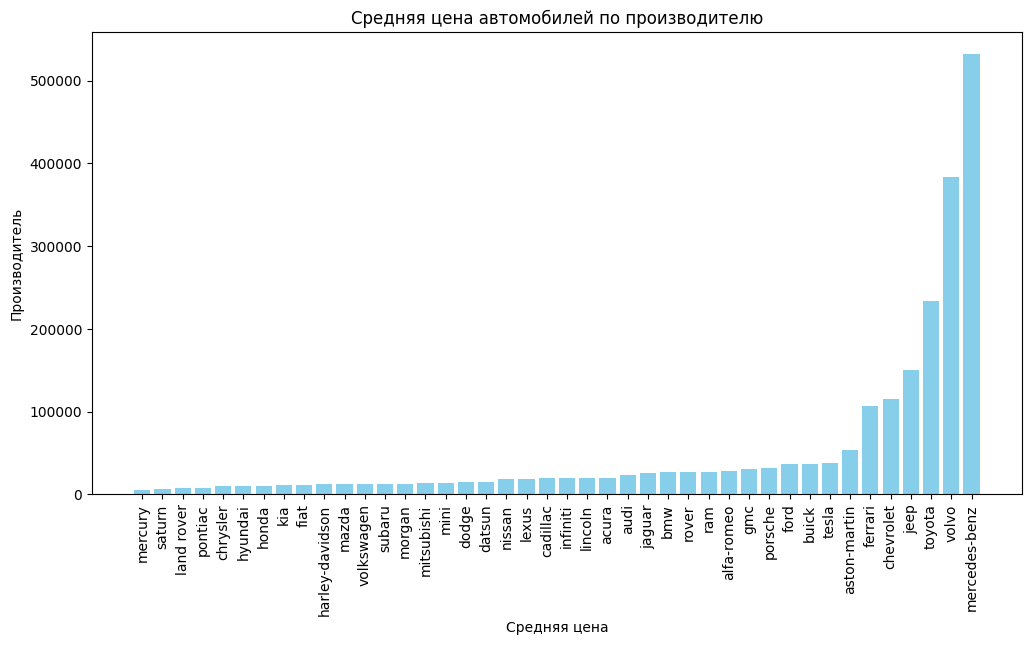

In [277]:
# Пункт 9

# 1. Средняя цена автомобилей по производителю
plt.figure(figsize=(12, 6))
avg_price_by_manufacturer = optimized_df.groupby('manufacturer')['price'].mean().sort_values()
plt.bar(avg_price_by_manufacturer.index, avg_price_by_manufacturer.values, color='skyblue')
plt.xticks(rotation=90)
plt.title('Средняя цена автомобилей по производителю')
plt.xlabel('Средняя цена')
plt.ylabel('Производитель')
plt.show()

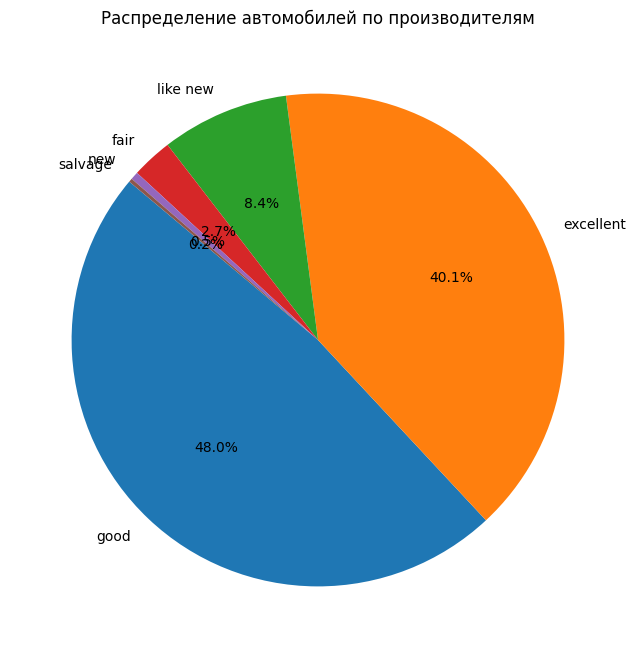

In [278]:
# 2. Распределение автомобилей по производителям
condition_counts = optimized_df['condition'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение автомобилей по производителям')
plt.show()

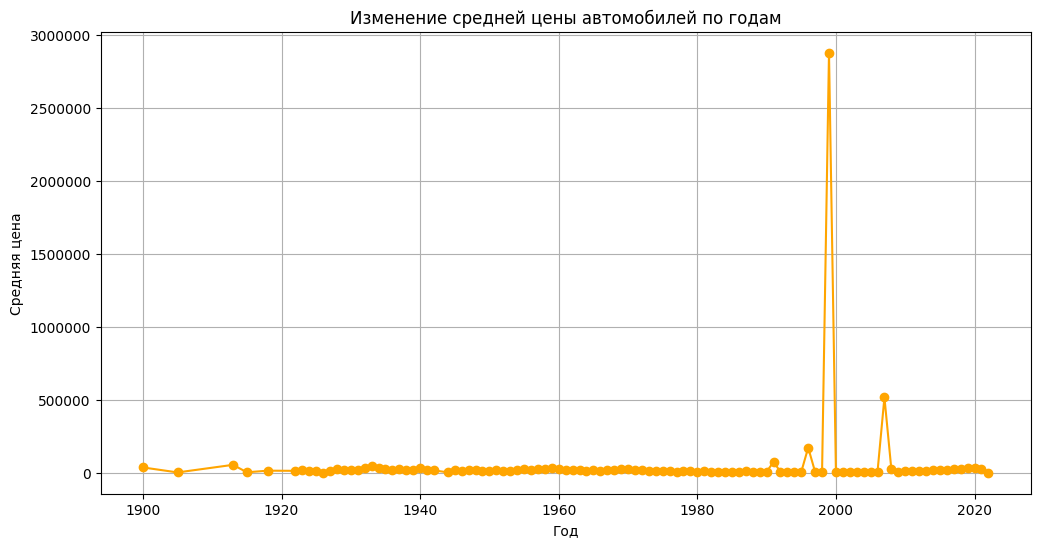

In [279]:
# 3. Линейный график: Изменение средней цены по годам
plt.figure(figsize=(12, 6))
avg_price_by_year = optimized_df.dropna().groupby('year')['price'].mean()
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='orange')
plt.ticklabel_format(style='plain', axis='y')
plt.title('Изменение средней цены автомобилей по годам')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.grid()
plt.show()

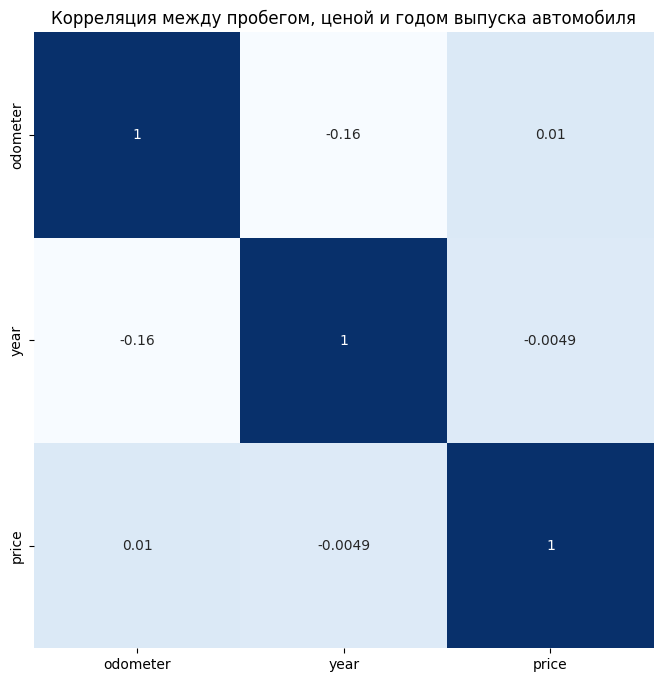

In [280]:
# 4. Корреляция между пробегом, ценой и годом выпуска автомобиля
plt.figure(figsize=(8,8))
sns.heatmap(optimized_df[['odometer', 'year', 'price']].dropna().corr(), cmap="Blues", annot=True, cbar=False)
plt.title('Корреляция между пробегом, ценой и годом выпуска автомобиля')
plt.show()

C:\Users\Max\AppData\Local\Temp\ipykernel_11820\1233719585.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  engine_counts = optimized_df.groupby(['manufacturer', 'fuel']).size().unstack()
C:\Users\Max\AppData\Local\Temp\ipykernel_11820\1233719585.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(optimized_df.groupby(['manufacturer', 'fuel']).size().unstack())


fuel             diesel  electric    gas  hybrid  other
manufacturer                                           
acura                48         0   4817      36   1054
alfa-romeo            0         0    540       0    353
aston-martin          0         0     22       0      2
audi                143        15   6380      72    946
bmw                 272        77  12930     119   1273
buick                 6         0   4927       1    531
cadillac             78         4   5985      20    834
chevrolet          3614       185  46386     244   4240
chrysler             15         1   5534      23    391
datsun                0         1     62       0      0
dodge               343         2  12460      10    827
ferrari               0         0     75       1     19
fiat                  1        24    668       0     94
ford              10282        77  54669     693   4829
gmc                2493         1  12761      24   1344
harley-davidson      16         0    129       0

<Figure size 1200x1200 with 0 Axes>

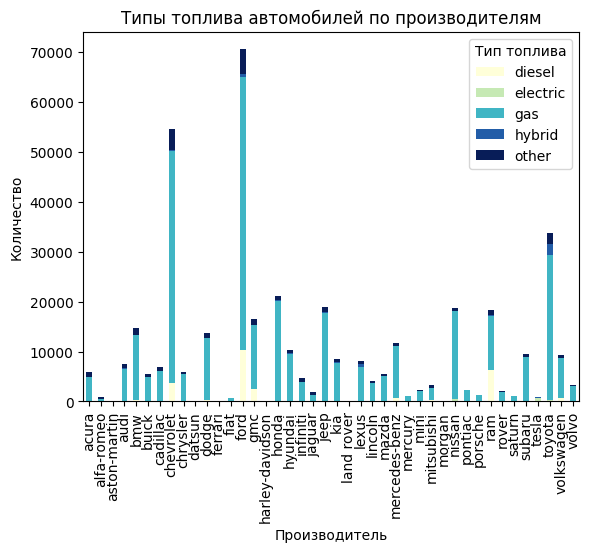

In [281]:
# 5. Распределение типов топлива по производителям
engine_counts = optimized_df.groupby(['manufacturer', 'fuel']).size().unstack()
print(optimized_df.groupby(['manufacturer', 'fuel']).size().unstack())
plt.figure(figsize=(12, 12))
engine_counts.plot(kind='bar', stacked=True, colormap='YlGnBu')
plt.title('Типы топлива автомобилей по производителям')
plt.xlabel('Производитель')
plt.ylabel('Количество')
plt.xticks(rotation=90)
plt.legend(title='Тип топлива')
plt.show()